## Problem
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

### Attribute Information
1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not
* Note: "Unknown" in smoking_status means that the information is unavailable for this patient


In [1]:
import warnings
warnings.filterwarnings("ignore")

#import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

%matplotlib inline

In [2]:
#read the data
df = pd.read_csv('/kaggle/input/strokedata/stroke_data.csv')

In [3]:
#check the 5 first rows 
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
#check last 5 rows
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


## EDA

In [5]:
df.shape

(5110, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 5110 entries, 0 to 5109

Data columns (total 12 columns):

 #   Column             Non-Null Count  Dtype  

---  ------             --------------  -----  

 0   id                 5110 non-null   int64  

 1   gender             5110 non-null   object 

 2   age                5110 non-null   float64

 3   hypertension       5110 non-null   int64  

 4   heart_disease      5110 non-null   int64  

 5   ever_married       5110 non-null   object 

 6   work_type          5110 non-null   object 

 7   Residence_type     5110 non-null   object 

 8   avg_glucose_level  5110 non-null   float64

 9   bmi                4909 non-null   float64

 10  smoking_status     5110 non-null   object 

 11  stroke             5110 non-null   int64  

dtypes: float64(3), int64(4), object(5)

memory usage: 479.2+ KB


In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
#check the missing values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
#calculate the percentage of the missing values 
df.isnull().sum() /df.shape[0] * 100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

The percentage of the missing value is 3.9%, we can drop them or fill them.

In [3]:
#drop the missing values 
dff =df.dropna()

In [11]:
dff.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [15]:
dff.stroke.value_counts()

0    4700
1     209
Name: stroke, dtype: int64

In [17]:
dff.stroke.value_counts()*100/dff.shape[0]

0    95.742514
1     4.257486
Name: stroke, dtype: float64

In [19]:
numerical_feature= list(dff._get_numeric_data().columns)
numerical_feature

['id',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke']

In [20]:
categorical_feature= list(set(dff.columns) - set(dff._get_numeric_data().columns)) 
categorical_feature

['gender', 'work_type', 'smoking_status', 'ever_married', 'Residence_type']

In [4]:
#we don't need id column
df1 = dff.drop(['id'], axis=1)
df1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Data Analysis
#### There are two major ways to analyze the data: 
1. Univariate Analysis: Analysing realationship of each feature with the target. 
2. Multivariate Analysis : Analysing realationship between multiple variables. 

## Univariate Analysis


First, we will plot the numeric features (age, avg_glucose_level,bmi)

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

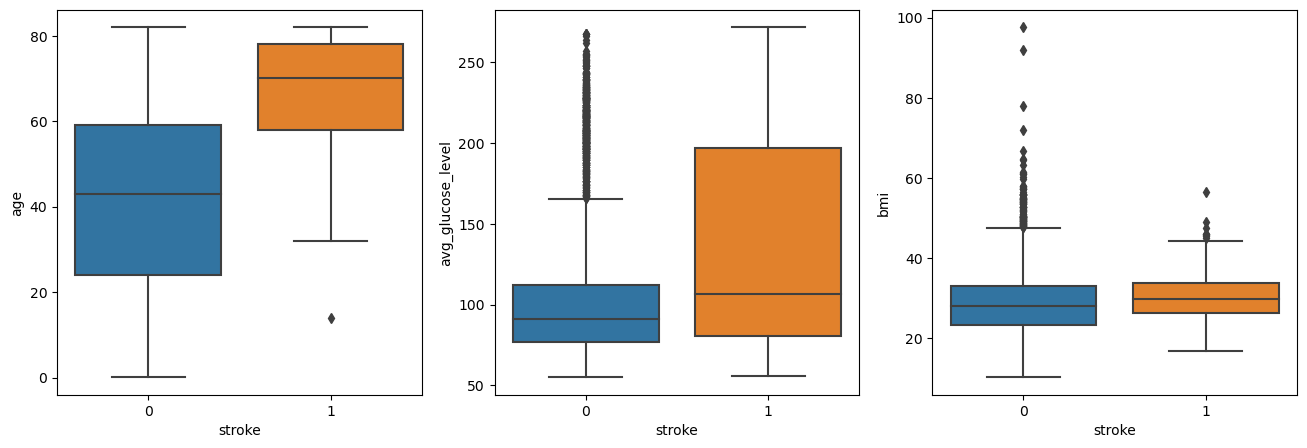

In [52]:
plt.figure(figsize=(16, 5))
plt.xticks(rotation=45)
plt.subplot(1, 3,1)
sns.boxplot(x=df1["stroke"], y=df1["age"])
plt.subplot(1, 3,2)
sns.boxplot(x=df1["stroke"], y=df1["avg_glucose_level"])
plt.subplot(1, 3,3)
sns.boxplot(x=df1["stroke"], y=df1["bmi"])

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

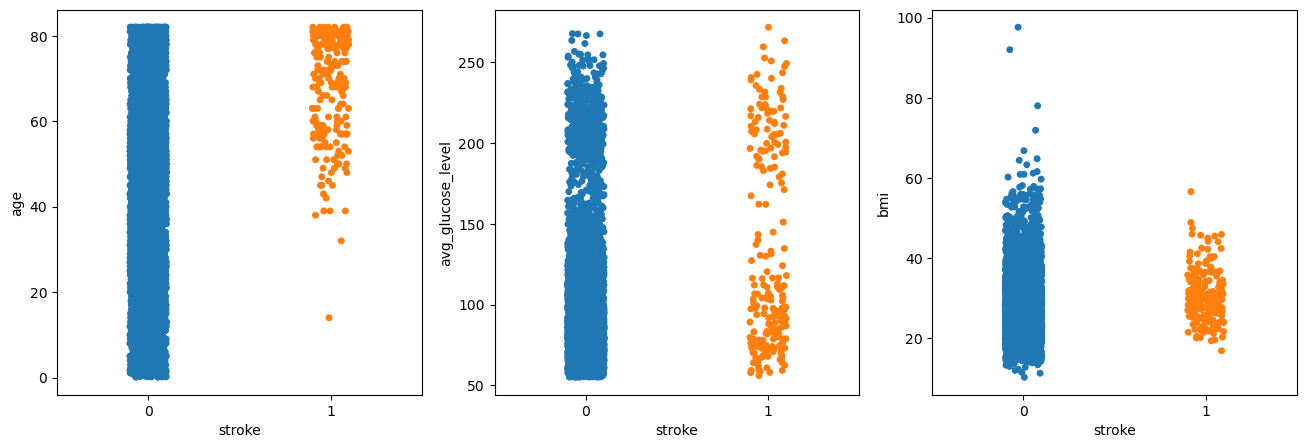

In [337]:
cols = ['age','avg_glucose_level','bmi']
plt.figure(figsize=(16, 5))
plt.subplot(1, 3,1)
sns.stripplot(data=df1, x='stroke',y='age')
plt.subplot(1, 3,2)
sns.stripplot(data=df1, x='stroke',y='avg_glucose_level')
plt.subplot(1, 3,3)
sns.stripplot(data=df1, x='stroke',y='bmi')

#### from the plots:
    1. Most of the People who get stroke age between 40-80 years old.
    2. People get stroke with high and low glucose level.
    3. The bmi is under 60 for patients who get stroke.
    4. There are outliers in average glucose level and bmi. 

Now, plots between categoical features and target

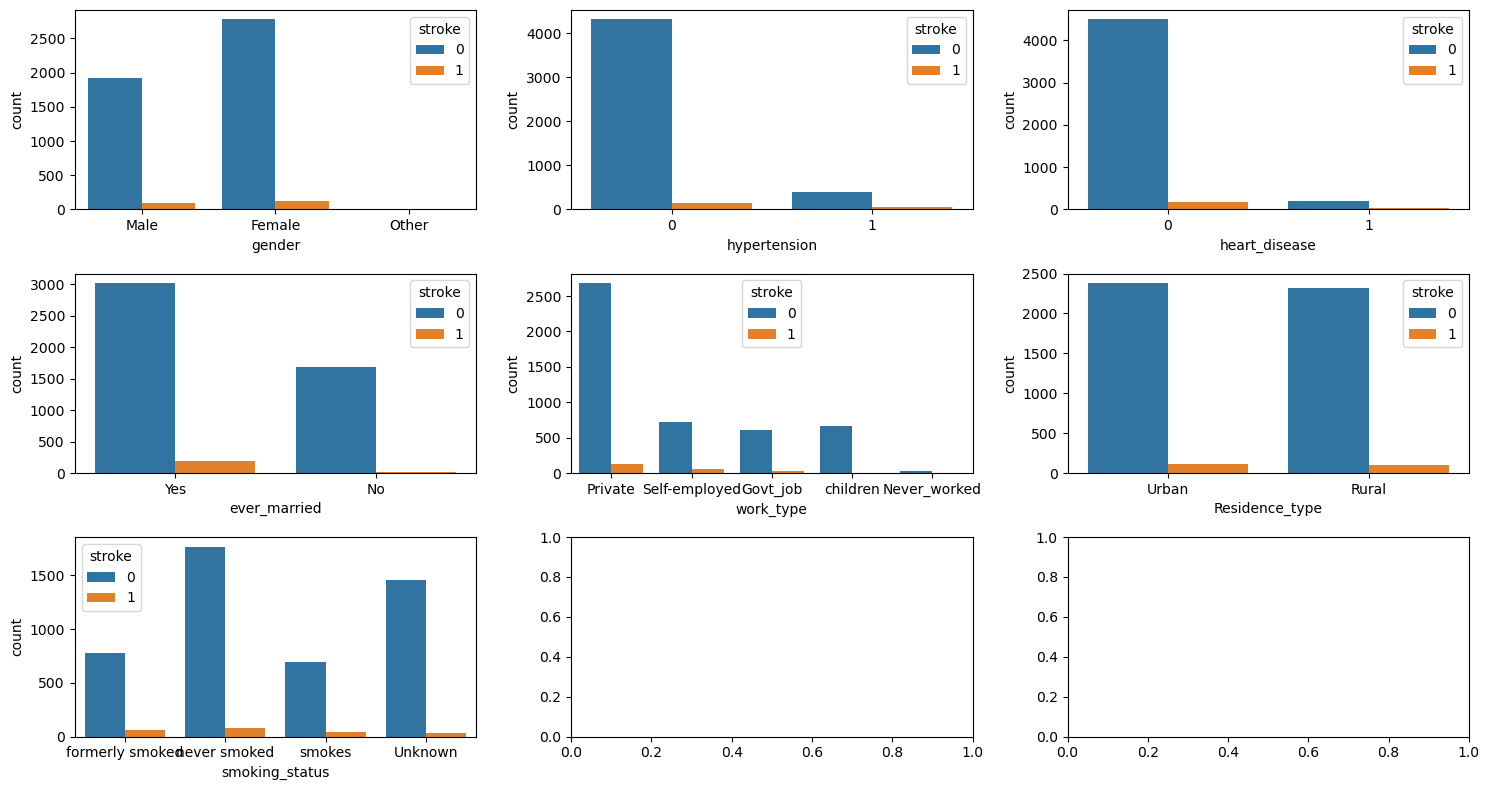

In [49]:
ncols =3
cat_cols =  ["gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status"]

fig,ax = plt.subplots(3, 3,figsize=(15, 8))

for idx, feature in enumerate(cat_cols):
    row = idx//ncols
    col = idx% ncols
    sns.countplot(data=df1, x=feature, hue='stroke',ax =ax[row,col])
    
plt.tight_layout()

<AxesSubplot:ylabel='stroke'>

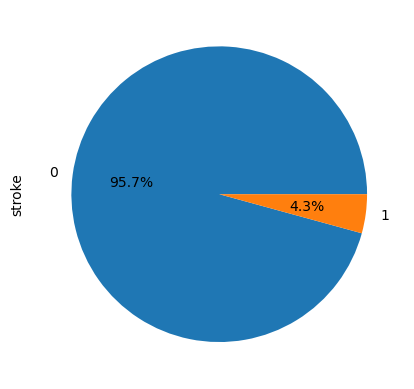

In [6]:
df1.stroke.value_counts().plot(kind='pie', autopct='%1.1f%%')

umbalanced data

# Multivariate Analysis

#### convert categorical to numbers 

In [5]:
categorical_cols = list(df1.select_dtypes(['object']).columns)
categorical_cols

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [6]:
categorical_map={}
for cat in categorical_cols:
    categorical_map[cat] = df1[cat].unique().tolist()
    
categorical_map

{'gender': ['Male', 'Female', 'Other'],
 'ever_married': ['Yes', 'No'],
 'work_type': ['Private',
  'Self-employed',
  'Govt_job',
  'children',
  'Never_worked'],
 'Residence_type': ['Urban', 'Rural'],
 'smoking_status': ['formerly smoked', 'never smoked', 'smokes', 'Unknown']}

In [7]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
df1['gender'] = label_encoder.fit_transform(df1['gender'])
print('\nGender ',df1['gender'].unique())
df1['ever_married'] = label_encoder.fit_transform(df1['ever_married'])
print('\nEver_married' ,df1['ever_married'].unique())
df1['work_type'] = label_encoder.fit_transform(df1['work_type'])
print('\nWork_type ',df1['work_type'].unique())
df1['Residence_type'] = label_encoder.fit_transform(df1['Residence_type'])
print('\nResidence_type',df1['Residence_type'].unique())
df1['smoking_status'] = label_encoder.fit_transform(df1['smoking_status'])
print('\nsmoking_status',df1['smoking_status'].unique())


Gender  [1 0 2]

Ever_married [1 0]

Work_type  [2 3 0 4 1]

Residence_type [1 0]

smoking_status [1 2 3 0]


In [25]:
df1.head

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


<AxesSubplot:>

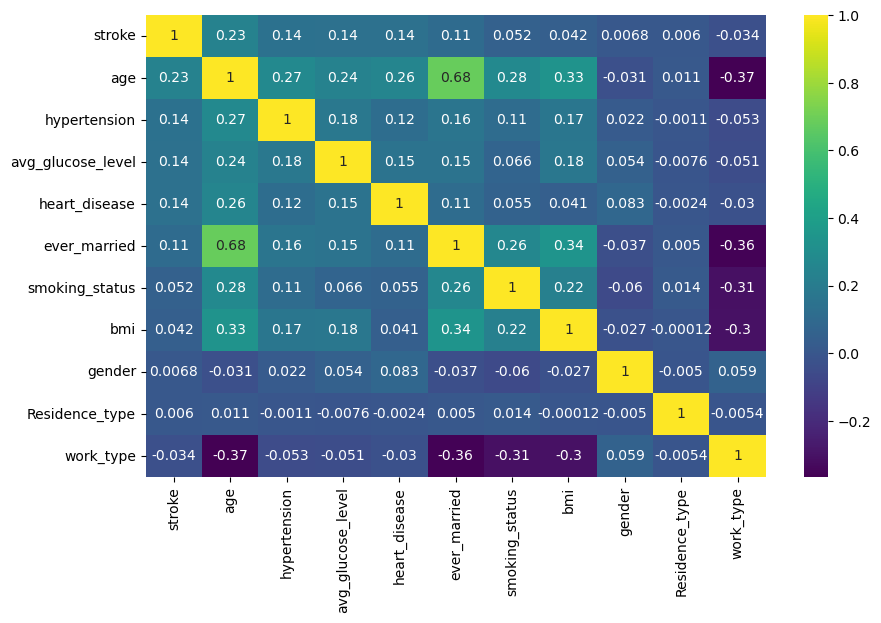

In [92]:
k = 11
cols = df1.corr().nlargest(k,'stroke')['stroke'].index 
cm = df1[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

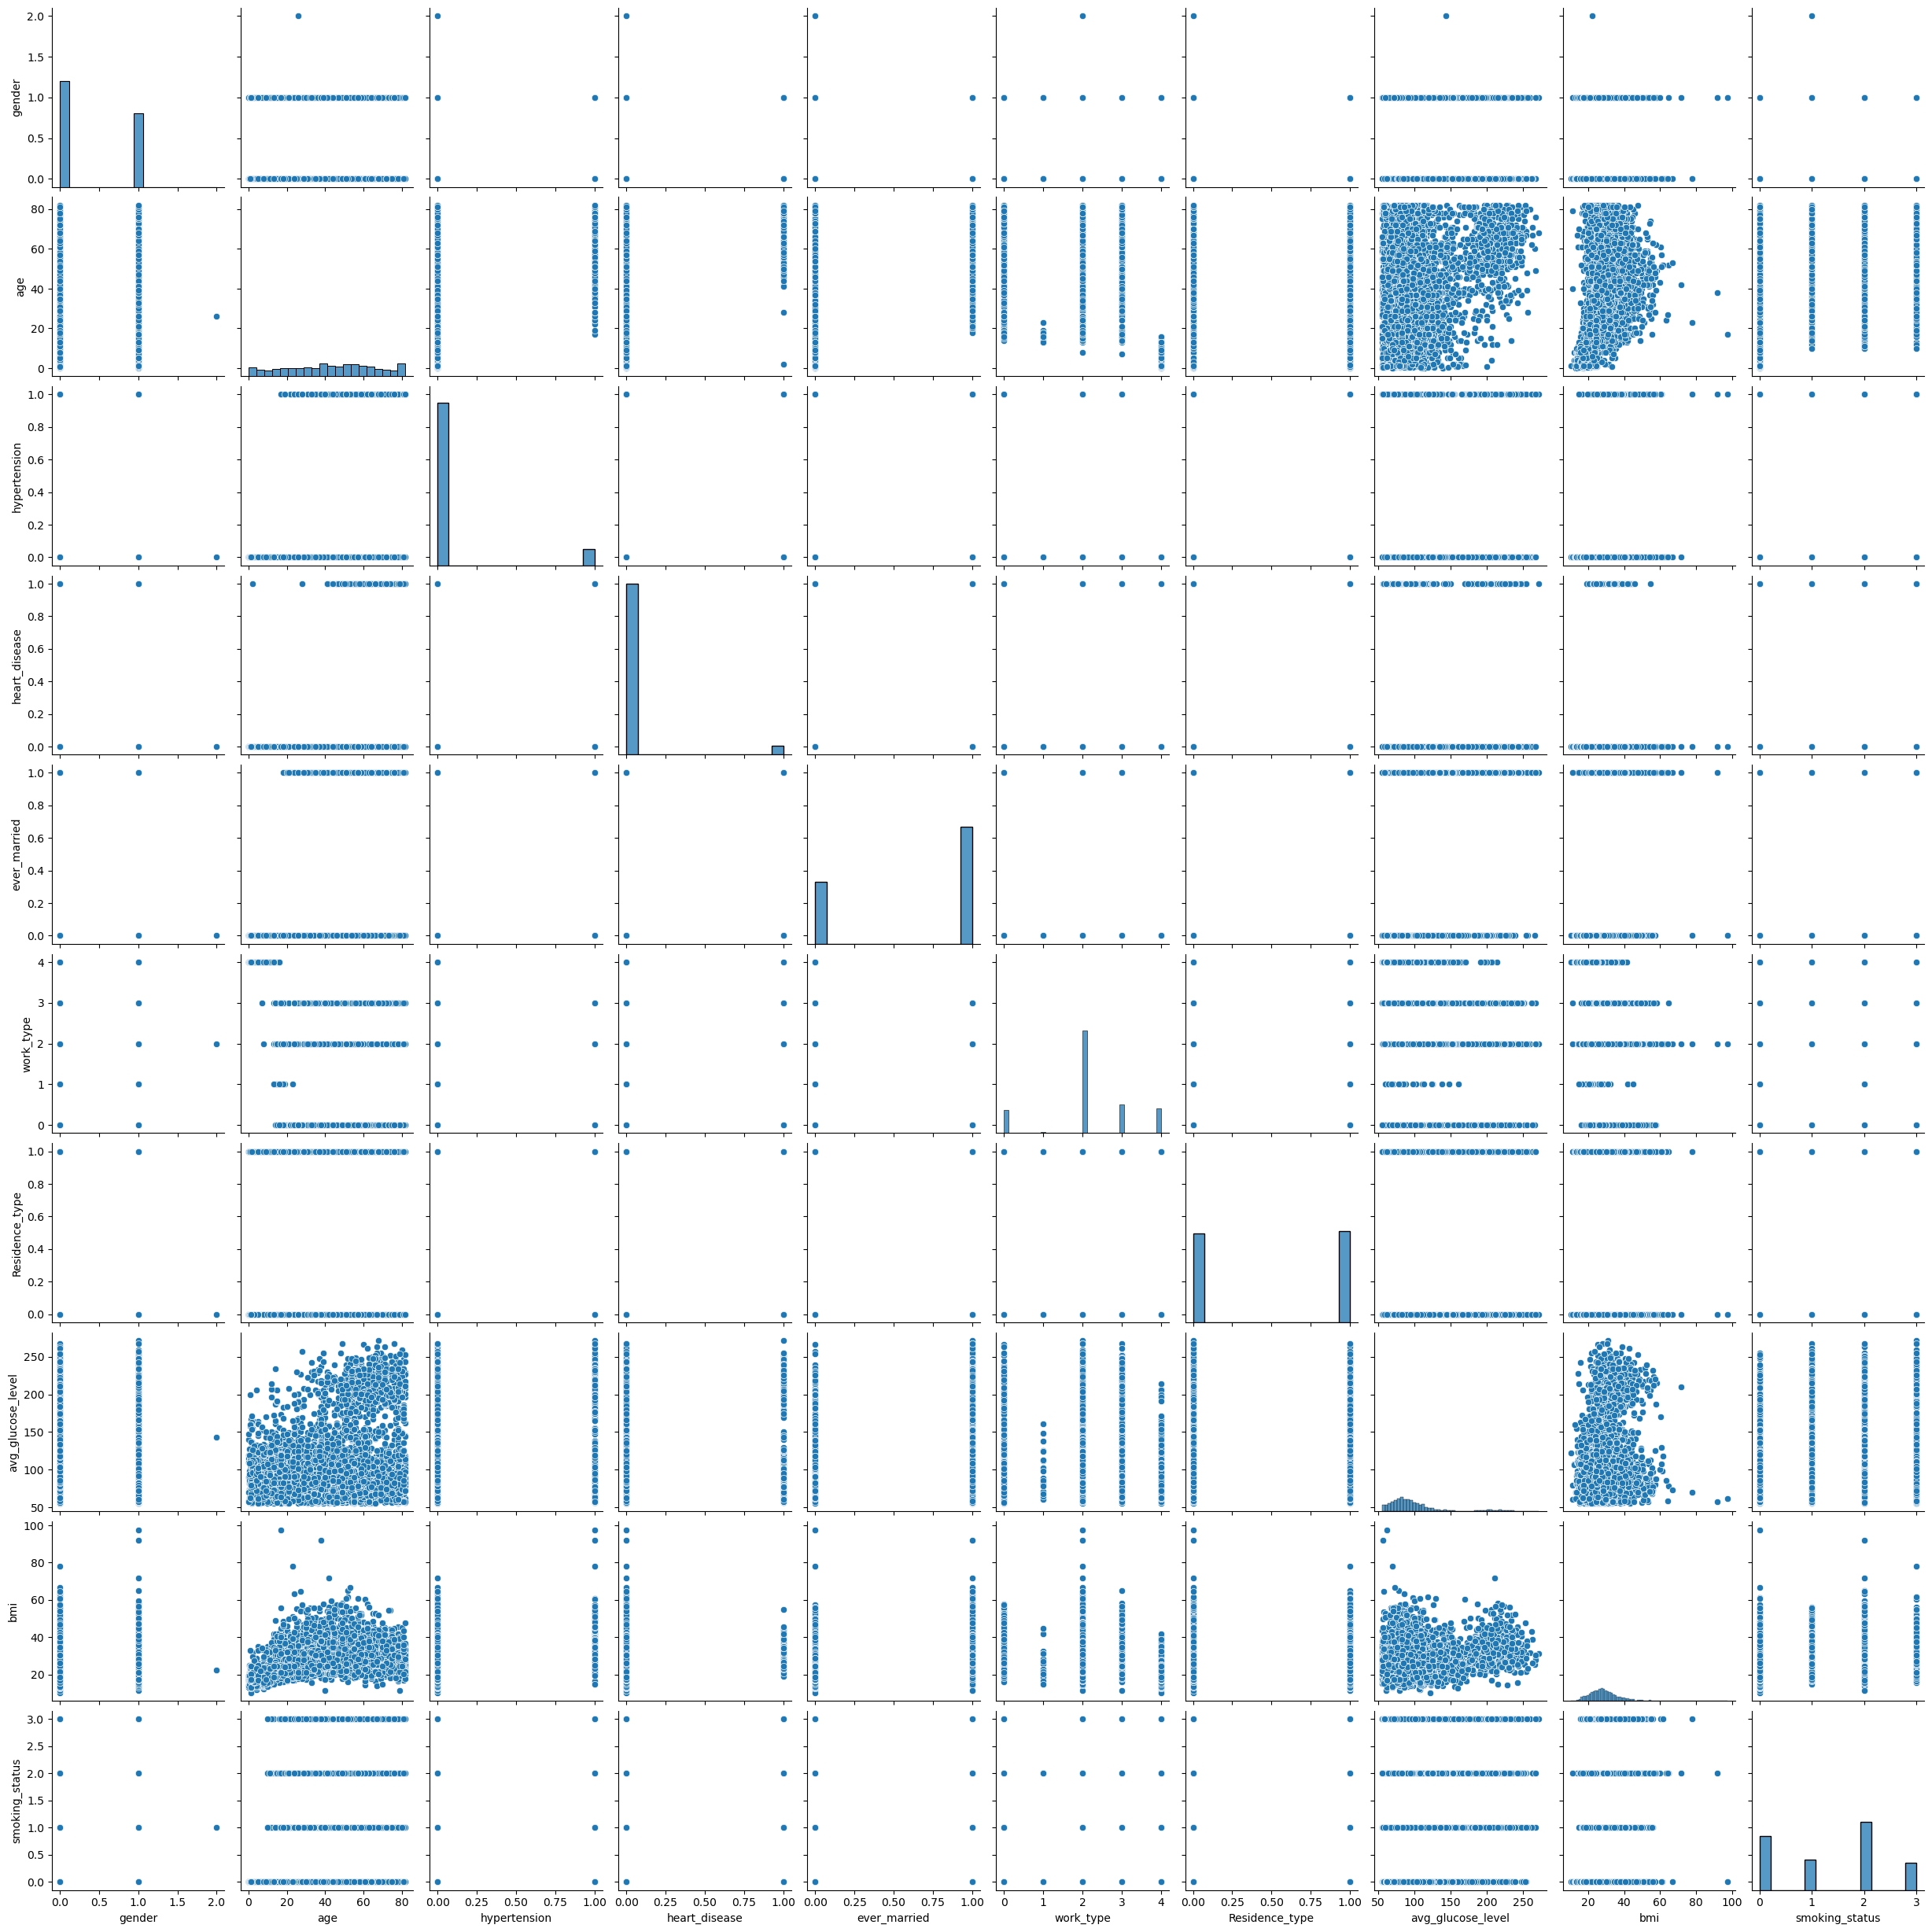

In [171]:
#relations between all variables 
cols = ['gender', 'age', 'hypertension', 'heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']
sns.pairplot(df1[cols])

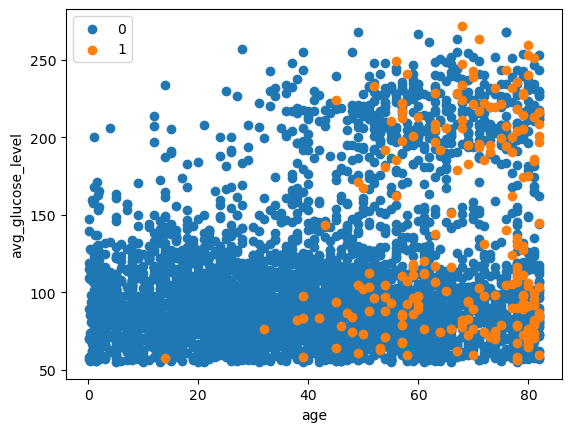

In [80]:
#relationship between age and avg glucose level
plt.scatter(df1.age[df.stroke==0], df1.avg_glucose_level[df.stroke==0])
plt.scatter(df1.age[df.stroke==1], df1.avg_glucose_level[df.stroke==1])
plt.xlabel("age")
plt.ylabel("avg_glucose_level")
plt.legend(['0','1'])

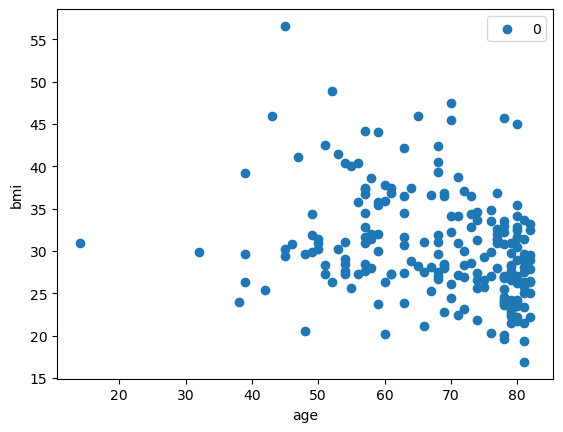

In [88]:
#plt.scatter(df1.age[df.stroke==0], df1.bmi[df.stroke==0])
plt.scatter(df1.age[df.stroke==1], df1.bmi[df.stroke==1])
plt.xlabel("age")
plt.ylabel("bmi")
plt.legend(['0','1'])

# Building models

### with cross-validation

## LGBM

In [15]:
from lightgbm import LGBMClassifier

# Split your data into features (X) and target variable (y)
X = df1.drop(['stroke'], axis=1)
y = df1.stroke

lgbm_model  = LGBMClassifier(random_state=42,
                         class_weight='balanced',
                         metric='none', is_unbalance=True)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Perform cross-validation and calculate metrics for each fold
fold = 1
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    lgbm_model.fit(X_train, y_train)
    y_pred = lgbm_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Print metrics for each fold
    print(f"Fold {fold} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")
    fold += 1

# Calculate the mean of each metric
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)
mean_f1_score = sum(f1_scores) / len(f1_scores)

# Print the mean results
print(f"Mean Accuracy: {mean_accuracy}")
print(f"Mean Precision: {mean_precision}")
print(f"Mean Recall: {mean_recall}")
print(f"Mean F1-Score: {mean_f1_score}")

Fold 1 - Accuracy: 0.8594990836896762, Precision: 0.1261682242990654, Recall: 0.38571428571428573, F1-Score: 0.1901408450704225
Fold 2 - Accuracy: 0.8600244498777506, Precision: 0.1267605633802817, Recall: 0.38571428571428573, F1-Score: 0.19081272084805653
Fold 3 - Accuracy: 0.85880195599022, Precision: 0.14473684210526316, Recall: 0.4782608695652174, F1-Score: 0.2222222222222222
Mean Accuracy: 0.8594418298525489
Mean Precision: 0.13255520992820344
Mean Recall: 0.4165631469979296
Mean F1-Score: 0.20105859604690043


## RandomForest

In [20]:
from imblearn.under_sampling import RandomUnderSampler

# Split your data into features (X) and target variable (y)
X = df1.drop(['stroke'], axis=1)
y = df1.stroke

# Create a Random Forest classifier
rf_model = RandomForestClassifier()

# Perform cross-validation using StratifiedKFold (or another suitable cross-validation method)
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []



# Perform cross-validation and calculate metrics for each fold
fold = 1
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rus = RandomUnderSampler(random_state=42)
    X_train_res, y_train_res = rus.fit_resample(X_train, y_train)
    
    rf_model.fit(X_train_res, y_train_res)
    y_pred = rf_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Print metrics for each fold
    print(f"Fold {fold} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")
    fold += 1

# Calculate the mean of each metric
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)
mean_f1_score = sum(f1_scores) / len(f1_scores)

# Print the mean results
print(f"Mean Accuracy: {mean_accuracy}")
print(f"Mean Precision: {mean_precision}")
print(f"Mean Recall: {mean_recall}")
print(f"Mean F1-Score: {mean_f1_score}")


Fold 1 - Accuracy: 0.7012828344532682, Precision: 0.10841121495327102, Recall: 0.8285714285714286, F1-Score: 0.19173553719008266
Fold 2 - Accuracy: 0.6693154034229829, Precision: 0.100169779286927, Recall: 0.8428571428571429, F1-Score: 0.17905918057663125
Fold 3 - Accuracy: 0.6907090464547677, Precision: 0.10344827586206896, Recall: 0.8260869565217391, F1-Score: 0.18387096774193548
Mean Accuracy: 0.6871024281103396
Mean Precision: 0.10400975670075567
Mean Recall: 0.8325051759834369
Mean F1-Score: 0.18488856183621646


## Over-Sampling 

In [31]:
X = df1.drop(['stroke'], axis=1)
y = df1.stroke

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gbc.fit(X_train_smote, y_train_smote)

y_pred = gbc.predict(X_test)

from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
print("Precision score: {}".format(precision_score(y_test,y_pred)))
print("Recall score: {}".format(recall_score(y_test,y_pred)))
print("F1 score: {}".format(f1_score(y_test,y_pred)))
print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))

Precision score: 0.08823529411764706

Recall score: 0.35714285714285715

F1 score: 0.14150943396226418

Accuracy score: 0.814663951120163


In [15]:
X = df1.drop(['stroke'], axis=1)
y = df1.stroke

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_smote, y_train_smote)

y_pred = rfc.predict(X_test)

from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
print("Precision score: {}".format(precision_score(y_test,y_pred)))
print("Recall score: {}".format(recall_score(y_test,y_pred)))
print("F1 score: {}".format(f1_score(y_test,y_pred)))
print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))

Precision score: 0.10344827586206896

Recall score: 0.14285714285714285

F1 score: 0.12000000000000001

Accuracy score: 0.9103869653767821


## Under_Sampling

## Gradient Boosting Classifier

In [17]:
X = df1.drop(['stroke'], axis=1)
y = df1.stroke

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_res, y_res, test_size=0.2, random_state=42)

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

from sklearn.metrics import precision_score, recall_score,f1_score, accuracy_score
print("Precision score: {}".format(precision_score(y_test,y_pred)))
print("Recall score: {}".format(recall_score(y_test,y_pred)))
print("F1 score: {}".format(f1_score(y_test,y_pred)))
print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))

Precision score: 0.6730769230769231

Recall score: 0.8333333333333334

F1 score: 0.74468085106383

Accuracy score: 0.7142857142857143


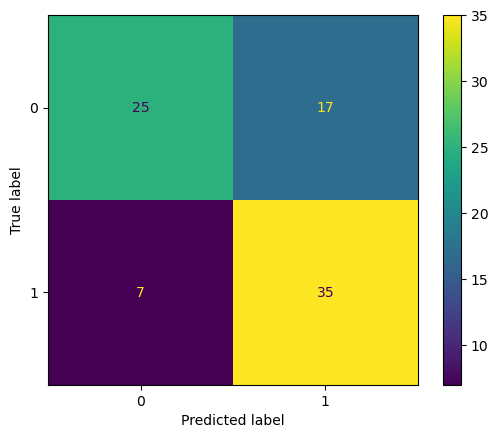

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_pred)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support



           0       0.78      0.60      0.68        42

           1       0.67      0.83      0.74        42



    accuracy                           0.71        84

   macro avg       0.73      0.71      0.71        84

weighted avg       0.73      0.71      0.71        84




##### we can see that under-sampling is bettter than over-sampling.

## Random Forest Classifier

In [22]:
X = df1.drop(['stroke'], axis=1)
y = df1.stroke

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
#n_estimators=100, max_features=3, random_state=7
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print("Precision score: {}".format(precision_score(y_test,y_pred)))
print("Recall score: {}".format(recall_score(y_test,y_pred)))
print("F1 score: {}".format(f1_score(y_test,y_pred)))
print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))

Precision score: 0.6981132075471698

Recall score: 0.8809523809523809

F1 score: 0.7789473684210525

Accuracy score: 0.75


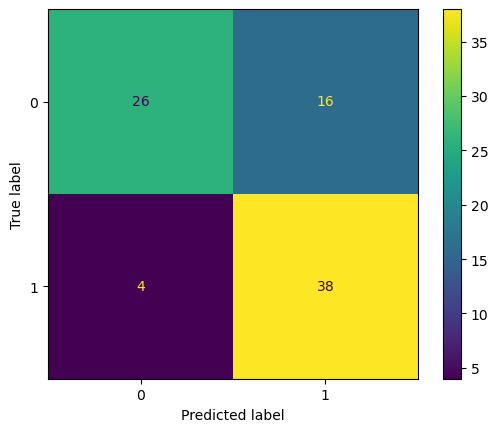

In [626]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_pred)

In [606]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support



           0       0.87      0.62      0.72        42

           1       0.70      0.90      0.79        42



    accuracy                           0.76        84

   macro avg       0.79      0.76      0.76        84

weighted avg       0.79      0.76      0.76        84




## XGBClassifier

In [23]:
# import XGBClassifier
X = df1.drop(['stroke'], axis=1)
y = df1.stroke

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

from xgboost import XGBClassifier
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100,
            'scale_pos_weight':4861/249
        }
            
xgb_clf = XGBClassifier(**params)

xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print("Precision score: {}".format(precision_score(y_test,y_pred)))
print("Recall score: {}".format(recall_score(y_test,y_pred)))
print("F1 score: {}".format(f1_score(y_test,y_pred)))
print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))

Precision score: 0.5915492957746479

Recall score: 1.0

F1 score: 0.743362831858407

Accuracy score: 0.6547619047619048


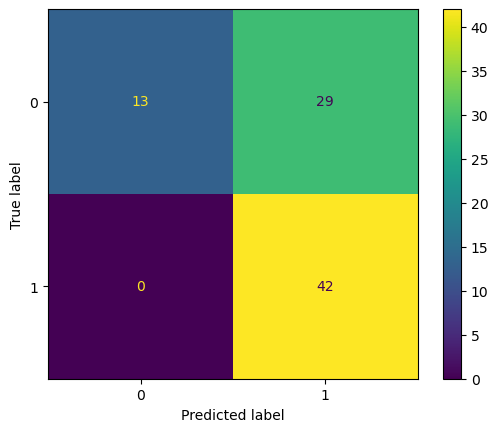

In [628]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_pred)

In [608]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support



           0       0.87      0.62      0.72        42

           1       0.70      0.90      0.79        42



    accuracy                           0.76        84

   macro avg       0.79      0.76      0.76        84

weighted avg       0.79      0.76      0.76        84




## Compare best three models

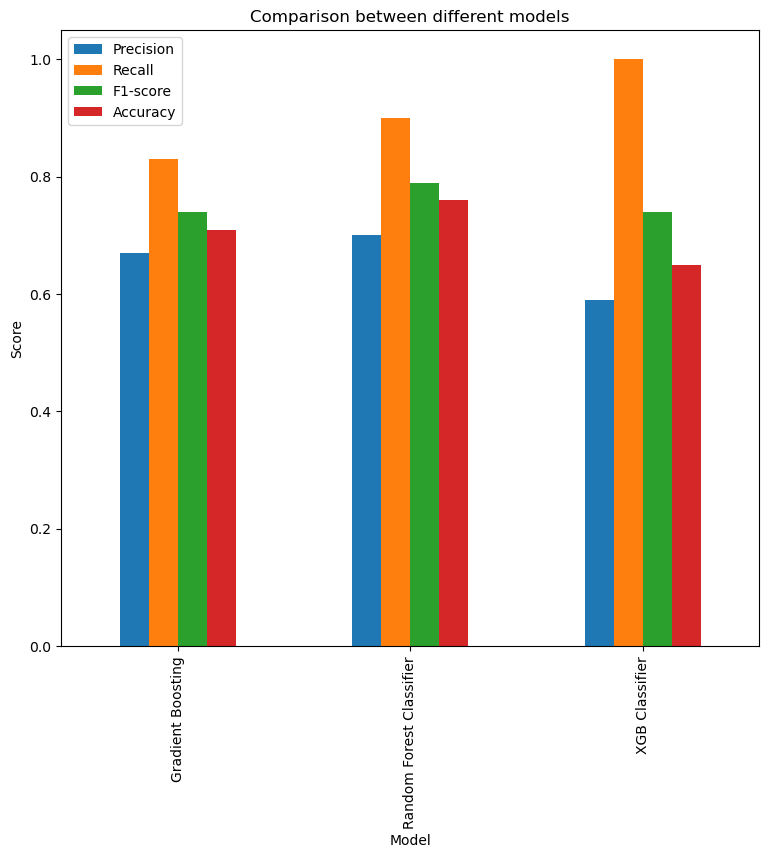

In [654]:
#plot
import pandas as pd 
import matplotlib.pyplot as plt 

data = [['Gradient Boosting', .67,.83,.74,.71],
        ['Random Forest Classifier', .70,.90,.79,.76],
        ['XGB Classifier', .59,1,.74,.65]
       ]

df=pd.DataFrame(data,columns=['Model','Precision','Recall','F1-score','Accuracy'])
df.plot(x='Model', y=['Precision','Recall','F1-score','Accuracy'], kind='bar',figsize=(9,8))
plt.ylabel("Score")
plt.title("Comparison between different models")
plt.show()


### suggestions: 
1. Increase the dataset to improve the model.
2. Treat missing values and outliers.
3. Try different algorithms.
4. Try to change the parameters. 